In [1]:
import os 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import custom functions
os.chdir('..')
from FLOCK_GPS import DataLoading, Preprocessing, ClusteringFeats


Load data

In [2]:
# Initialize path to data (UTM-converted datasets)
data_dir = os.getcwd() + '\\SampleData'

# Load datasets
raw_datasets = DataLoading.load_data(data_dir)

# Re-shape datasets
datasets = DataLoading.pivot_datsets(raw_datasets)

Get the interpolated data

In [3]:
# get interpolated datasets
interp_datasets = Preprocessing.interpolate_datasets(datasets, threshold = 0.99)

Get movement periods


In [4]:
# get slices for movement periods and break times   
rucks_bySquad, rests_bySquad, all_stops = Preprocessing.get_slices_byArea(interp_datasets, plot=False)

Extracting movement periods


100%|██████████| 3/3 [04:38<00:00, 92.84s/it] 


Get the smoothed data of one example squad


In [5]:
smooth_rucks = Preprocessing.spline_smoothing(rucks_bySquad[0], s=3e1, UTM=True)

set up plot params

In [6]:
# get group member names
names = smooth_rucks[0].latitude.columns.tolist()
# define colors for all plots 
color_dictionary = dict(zip(names, sns.color_palette(as_cmap=True)[:len(names)]))

Get clusters over time

In [7]:
all_membership_probs, all_labels, all_scores = ClusteringFeats.cluster_for_separation(smooth_rucks, UTM=True, method='HDBSCAN', epsilon=10, min_cluster_size = 2)

Plot labels from the first movement period <br>Labels of -1 indicate an outlier, labels: 0, 1, 2 ect. are group numbers

<AxesSubplot:>

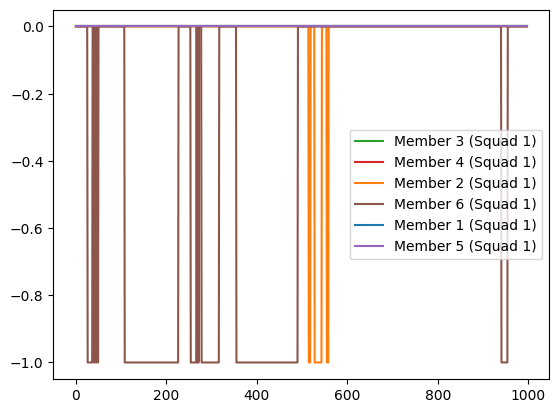

In [8]:
all_labels[0].plot(color = color_dictionary)

Get values for how many samples each individual is labelled as an outlier

In [9]:
outlier_times = ClusteringFeats.get_outlier_time(all_labels)
outlier_times[0]

Member 3 (Squad 1)      0.0
Member 4 (Squad 1)      0.0
Member 2 (Squad 1)     24.0
Member 6 (Squad 1)    341.0
Member 1 (Squad 1)      0.0
Member 5 (Squad 1)      0.0
Name: number of samples as outlier, dtype: float64

Get clusters over time, increase 'epsilon' (distance for combining clusters)<br>
to avoid micro-clustering

In [10]:
all_membership_probs, all_labels, all_scores = ClusteringFeats.cluster_for_separation(smooth_rucks, UTM=True, method='HDBSCAN', epsilon=25, min_cluster_size = 2)

Plot labels from the first movement period <br>Labels of -1 indicate an outlier, labels: 0, 1, 2 ect. are group numbers

<AxesSubplot:>

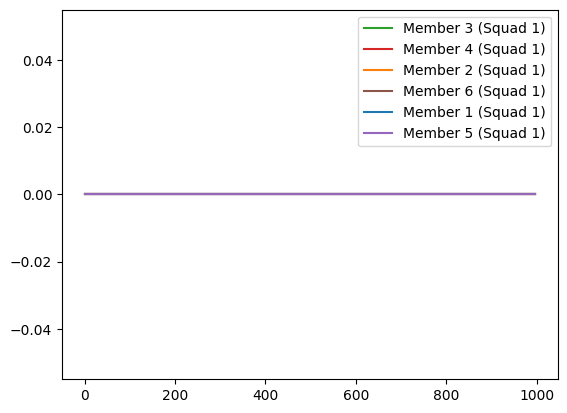

In [11]:
all_labels[0].plot(color = color_dictionary)

Even when there are no outliers detected, we can get metrics for how strong the spatial membership is to a group

In [12]:
timepoint = 150

Plot the 'membership confidence' metric over time for each individual

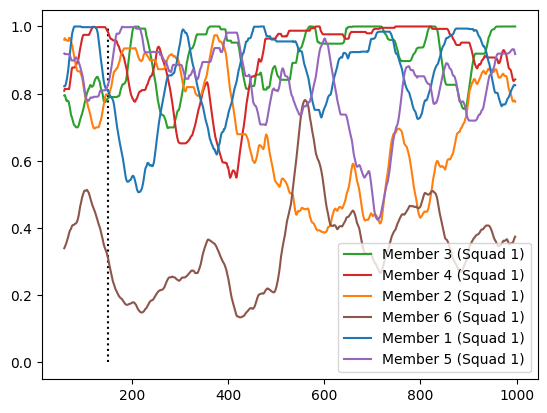

In [13]:
all_membership_probs[0].rolling(60).mean().plot(color=color_dictionary)
plt.vlines(timepoint, ymin=0, ymax=1, color='k', ls=':')

Plot the 'membership confidence' metric for each individual at one timepoint 

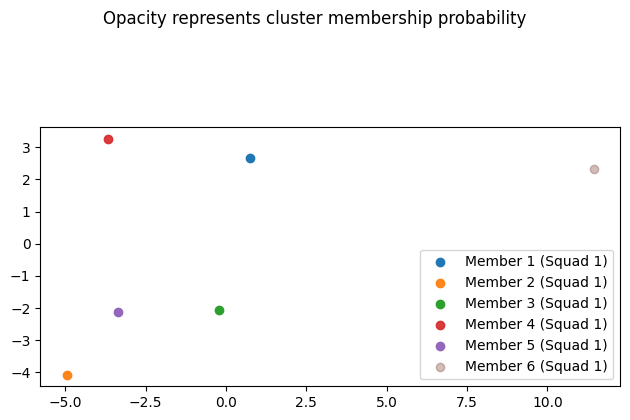

In [14]:
for X, Y, c, op, name in zip(smooth_rucks[0].iloc[timepoint].UTM_x, smooth_rucks[0].iloc[timepoint].UTM_y, color_dictionary.values(), all_membership_probs[0].iloc[timepoint].sort_index(), smooth_rucks[0].iloc[timepoint].UTM_x.index):
    plt.scatter(X - smooth_rucks[0].iloc[timepoint].UTM_x.mean(), Y - smooth_rucks[0].iloc[timepoint].UTM_y.mean(), c=c, alpha=op, label=name)
plt.gca().set_aspect('equal')
plt.suptitle('Opacity represents cluster membership probability')
plt.legend()
plt.tight_layout()

In [15]:
all_membership_probs[0].iloc[timepoint].sort_index()

Member 1 (Squad 1)    1.000000
Member 2 (Squad 1)    0.940530
Member 3 (Squad 1)    1.000000
Member 4 (Squad 1)    0.900897
Member 5 (Squad 1)    1.000000
Member 6 (Squad 1)    0.389041
Name: 150, dtype: float64

GIF

In [16]:
all_membership_probs, all_labels, all_scores = ClusteringFeats.cluster_for_separation(smooth_rucks, UTM=True, method='HDBSCAN', epsilon=10, min_cluster_size = 2)

In [17]:
prepped_clust_dfs = ClusteringFeats.prep_cluster_df(smooth_rucks, all_labels, all_membership_probs)

re-formatting data


  0%|          | 0/10 [00:00<?, ?it/s]

In [18]:
ClusteringFeats.make_cluster_gifs(prepped_clust_dfs[:1], decimation = 2)

  0%|          | 0/1 [00:00<?, ?it/s]

trimming timepoints
initialize animation plot
generate animation plot


  0%|          | 0/499 [00:00<?, ?it/s]

save plot
GIF saved to: c:\Users\James\GitRepos\GPS-ruck\Figures\GIF_Squad_1_0.gif


Grid lines are 5 meters apart <br>
Colors represent different clusters <br>
Opacity represents 'cluster membership probability' <br>

<img src= '..\Figures\GIF_Squad_1_0.gif' width='700' align='center'>